In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import sympy as sy
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
sy.init_printing()
%matplotlib inline

#### Complex Functions

In [2]:
x = np.linspace(-1, 1, 401)
y = np.linspace(-1, 1, 401)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

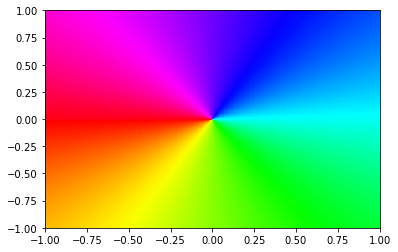

In [3]:
plt.pcolormesh(X, Y, np.angle(Z), cmap='hsv')

### Problem 1. 
Write the following function to plot any function from $\mathbb{C}$ to $\mathbb{C}$. Plot the angle only, as above, ignoring the magnitude.

    ￼￼def plot_complex(f,xbounds, ybounds, res=401):
        '''Plot the complex function f.
        INPUTS:
        f        - A function handle. Should represent a function
                from C to C.
        xbounds  - A tuple (xmin, xmax) describing the bounds on the real part
                    of the domain.
        ybounds  - A tuple (ymin, ymax) describing the bounds on the imaginary
                    part of the domain.
        res      - A scalar that determines the resolution of the plot.
                    Defaults to 401.
        '''

Check your function on $f(z) = z$ (graphed in Figure 14.2) and on the function $f(z) = \sqrt{z^2 +1}$ which is graphed in Figure 14.3

Hint: When you call `plt.pcolormesh()`, specify the keyword arguments `vmin` and `vmax`. These define which values should map to each end of the color scale. We want $-\pi$ to map to the low end of the color scale and $\pi$ to map to the high end. If not specified, matplotlib will scale the colormap to fit your data eexactly.



In [4]:
def plot_complex(f,xbounds, ybounds, res=401):
    '''Plot the complex function f.
    INPUTS:
    f        - A function handle. Should represent a function
            from C to C.
    xbounds  - A tuple (xmin, xmax) describing the bounds on the real part
                of the domain.
    ybounds  - A tuple (ymin, ymax) describing the bounds on the imaginary
                part of the domain.
    res      - A scalar that determines the resolution of the plot.
                Defaults to 401.
    '''
    x = np.linspace(xbounds[0], xbounds[1], res)
    y = np.linspace(xbounds[0], xbounds[1], res)
    X, Y = np.meshgrid(x, y)
    complex_ = f(X,Y)
    
    plt.pcolormesh(X, Y, np.angle(complex_), cmap='hsv',vmin=-np.pi, vmax=np.pi)

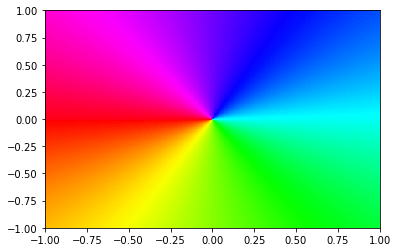

In [5]:
f = lambda X,Y: X + 1j*Y
plot_complex(f, (-1, 1), (-1, 1), )

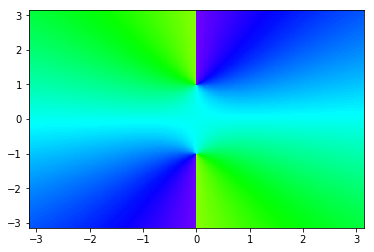

In [6]:
f = lambda X,Y: np.sqrt((X+1j*Y)**2 +1)
plot_complex(f, (-np.pi, np.pi), (-np.pi, np.pi), )

### Problem 2.

Write a new complex plotting function called `plot_complex_magnitude` which ignores the angle and plots only the magnitude. This should resemble your answer to Problem 1, with small modifications. Leave vmin and vmax unspecified when plotting.

Check your function on $f(z) = \sqrt{z^2 + 1}$. Your plot should look like the right subplot in Figure 14.4. Note the difference between this plot and the one from the previous problem.

Hint: A wraparound colormap like 'hsv' doesn’t work well here. Use any sequential colormap that makes it easy to distinguish between high and low values. See the matplotlib documentation for a list of color

In [7]:
def plot_complex_magnitude(f,xbounds, ybounds, res=401):
    x = np.linspace(xbounds[0], xbounds[1], res)
    y = np.linspace(xbounds[0], xbounds[1], res)
    X, Y = np.meshgrid(x, y)
    complex_ = f(X,Y)
    
    plt.pcolormesh(X, Y, np.absolute(complex_), cmap='YlGnBu')

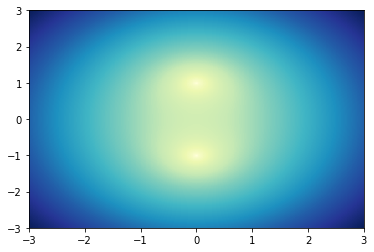

In [8]:
f = lambda X,Y: np.sqrt((X+1j*Y)**2 +1)
plot_complex_magnitude(f, (-3, 3), (-3, 3))

### Problem 3.

1. Use `plot_complex()` to plot the functions $z^2$, $z^3$, and $z^4$.

2. Plot $z^3 - iz^4 - 3z^6$ on the domain ${x+iy | x \epsilon [-1,1], y \epsilon [-1,1]}$ (this plot is Figure 14.5). Compare it to your plot of $z^3$, especially near the origin. Based on these plots, what can you learn about the zeros of a function from its graph?

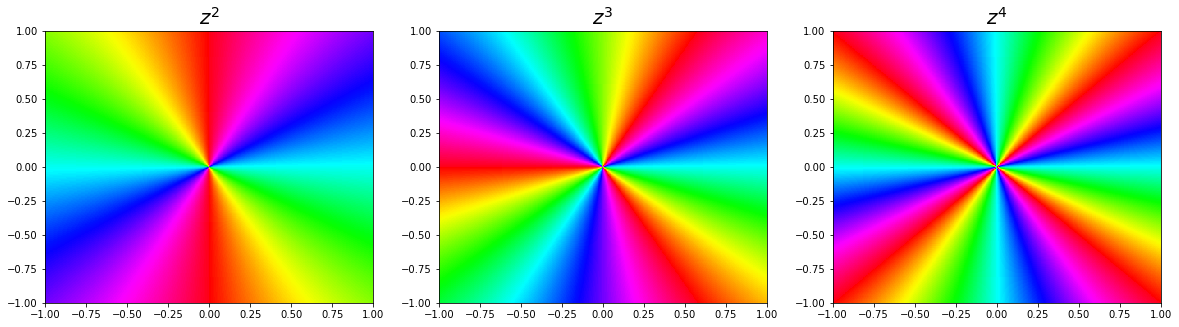

In [9]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
#z**2
f = lambda x,y: (x+1j*y)**2
plot_complex(f, (-1, 1), (-1, 1))
plt.title("$z^2$", size = 20)

plt.subplot(132)
#z**3
f = lambda x,y: (x+1j*y)**3
plot_complex(f, (-1, 1), (-1, 1))
plt.title("$z^3$", size = 20)

plt.subplot(133)
#z**4
f = lambda x,y: (x+1j*y)**4
plot_complex(f, (-1, 1), (-1, 1))
plt.title("$z^4$", size = 20)

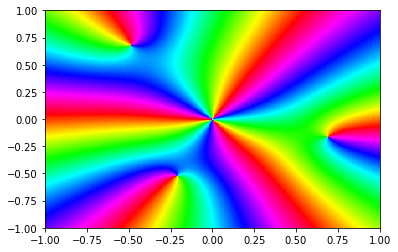

In [10]:
f = lambda x,y: (x+1j*y)**3 - 1j*(x+1j*y)**4 - 3*(x+1j*y)**6
plot_complex(f, (-1, 1), (-1, 1))

### Problem 4.

1. Use `plot_complex()` to plot the function f(z) = 1/z. Compare this to the plot of f(z) = z in Figure 14.2.

2. Plot $z^{-2}$, $z^{-3}$, and $z^2 +iz^{-1} + z^{-3}$ on the domain ${x+iy | x \epsilon [-1, 1], y \epsilon [-1, 1]}$. Compare the plots of the last two functions near the origin. Based on these plots, what can you learn about the poles of a function from its graph?

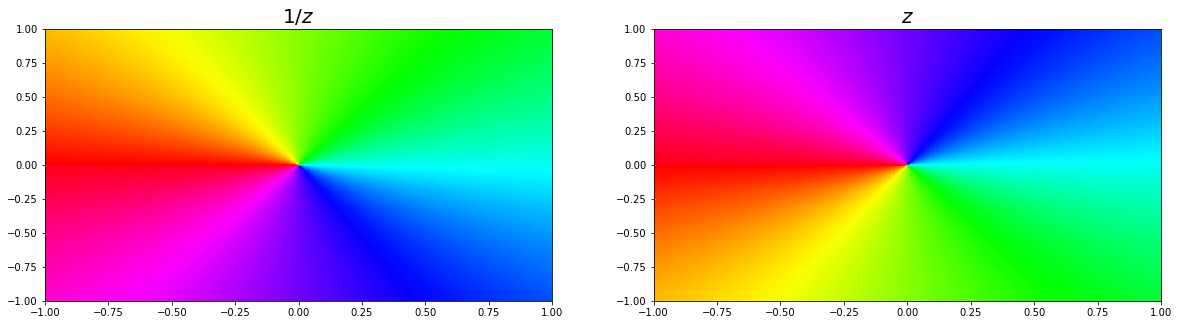

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(121)
f = lambda x,y: (x+1j*y)**-1
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$1/z$", size = 20)

plt.subplot(122)
f = lambda x,y: (x+1j*y)
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$z$", size = 20)

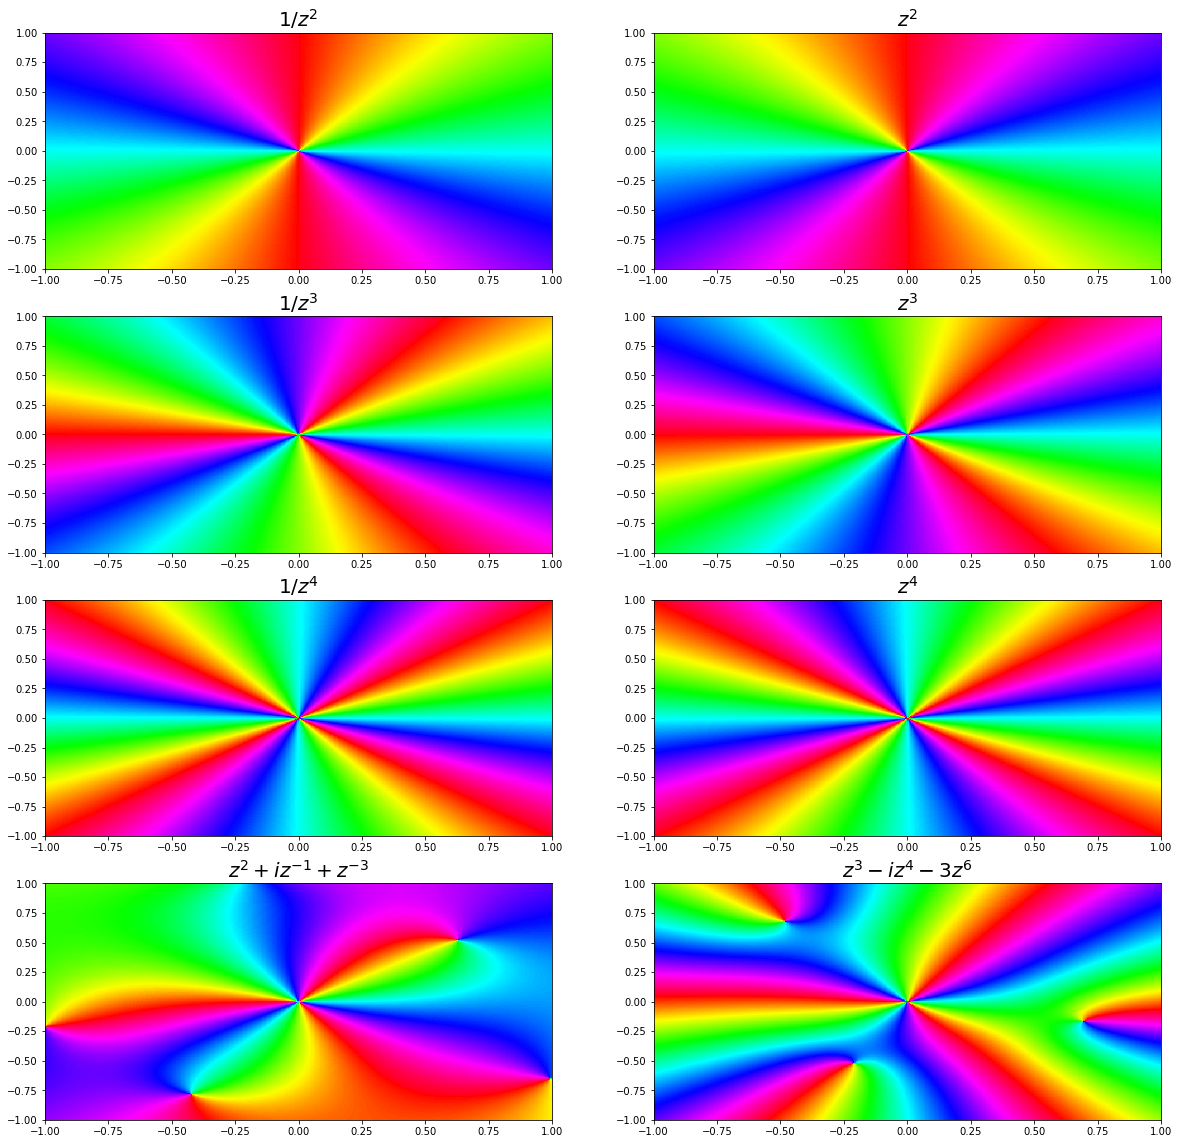

In [12]:
plt.figure(figsize=(20, 20))

plt.subplot(4,2,1)
f = lambda x,y: (x+1j*y)**-2
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$1/z^2$", size = 20)

plt.subplot(4,2,2)
f = lambda x,y: (x+1j*y)**2
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$z^2$", size = 20)

plt.subplot(4,2,3)
f = lambda x,y: (x+1j*y)**-3
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$1/z^3$", size = 20)

plt.subplot(4,2,4)
f = lambda x,y: (x+1j*y)**3
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$z^3$", size = 20)

plt.subplot(4,2,5)
f = lambda x,y: (x+1j*y)**-4
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$1/z^4$", size = 20)

plt.subplot(4,2,6)
f = lambda x,y: (x+1j*y)**4
plot_complex(f, (-1, 1), (-1, 1),res=402)
plt.title("$z^4$", size = 20)

plt.subplot(4,2,7)
f = lambda x,y: (x+1j*y)**2 + 1j*(x+1j*y)**-1 + (x+1j*y)**-3
plot_complex(f, (-1, 1), (-1, 1), res = 402)
plt.title("$z^2 +iz^{-1} + z^{-3}$", size = 20)

plt.subplot(4,2,8)
f = lambda x,y: (x+1j*y)**3 - 1j*(x+1j*y)**4 - 3*(x+1j*y)**6
plot_complex(f, (-1, 1), (-1, 1), res = 402)
plt.title("$z^3 - iz^4 - 3z^6$", size = 20)


### Problem 5.
Plot these functions on the domains given. Estimate the number and order of their poles and zeros.

$ f(z) = e^z$   on  ${x+iy | x \epsilon [-8, 8], y \epsilon [-8,8]}$

$ f(z) = tan(z)$  on  ${x+iy | x \epsilon [-8, 8], y \epsilon [-8,8]}$

$ f(z) = \frac{16z^4 + 32z^3 +32z^2 + 16z +4}{16z^4 - 16z^3 + 5z^2}$  on  ${x+iy | x \epsilon [-1, 1], y \epsilon [-1,1]}$

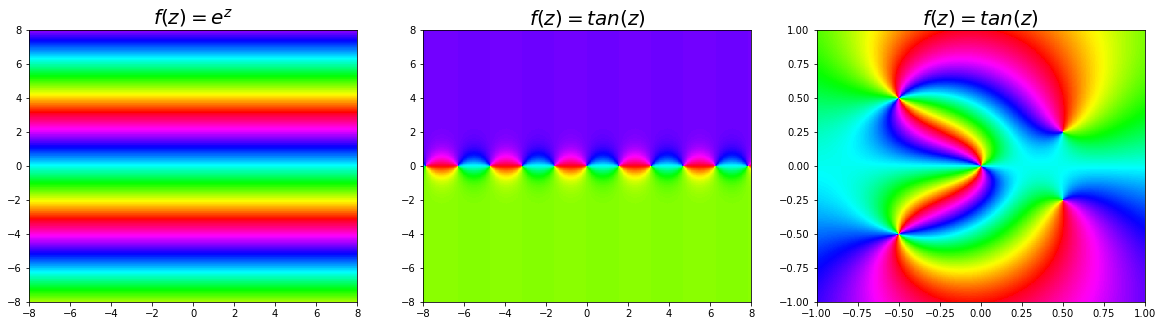

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(131)
f = lambda x,y: np.exp(x+1j*y)
plot_complex(f, (-8,8), (-8,8))
plt.title("$f(z) = e^z$", size = 20)

plt.subplot(132)
f = lambda x,y: np.tan(x+1j*y)
plot_complex(f, (-8,8), (-8,8))
plt.title("$f(z) = tan(z)$", size = 20)

plt.subplot(133)
f = lambda x,y: (16*(x+1j*y)**4 + 32*(x+1j*y)**3 + 32*(x+1j*y)**2 + 16*(x+1j*y) + 4)/(16*(x+1j*y)**4 - 16*(x+1j*y)**3 + 5*(x+1j*y)**2)
plot_complex(f, (-1,1), (-1,1), res = 402)
plt.title("$f(z) = tan(z)$", size = 20)

### Problem 6. 

Use complex plots to determine the multiplicity of the zeros of each of the following polynomials. Use the Fundamental Theorem of Algebra to ensure that you have found them all.

$ -4z^5 + 2z^4 - 2z^3 -4z^2 + 4z -4$

$ z^7 + 6z^6 - 131z^5 - 419z^4 + 4906z^3 - 131z^2 - 420z +4900$

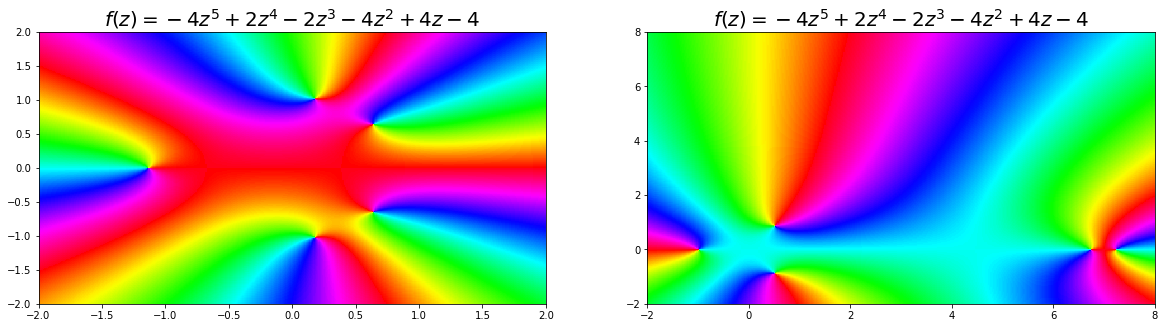

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(121)
f = lambda x,y: -4*(x+1j*y)**5 + 2*(x+1j*y)**4 - 2*(x+1j*y)**3 -4*(x+1j*y)**2 + 4*(x+1j*y) -4
plot_complex(f, (-2,2), (-2,2))
plt.title("$f(z) =-4z^5 + 2z^4 - 2z^3 -4z^2 + 4z -4$", size = 20)

plt.subplot(122)
f = lambda x,y: (x+1j*y)**7 + 6*(x+1j*y)**6 -131*(x+1j*y)**5 -419*(x+1j*y)**4 + 4906*(x+1j*y)**3 - 131*(x+1j*y)**2 -131*(x+1j*y)**2 -420*(x+1j*y)+4900
plot_complex(f, (-2,8), (-2,2))
plt.title("$f(z) =-4z^5 + 2z^4 - 2z^3 -4z^2 + 4z -4$", size = 20)


### Problem 7.

1. This example shows that sometimes you have to “zoom in” to see all the information about a pole.
    
    (a) Plot the function $f(z) = sin(\frac{1}{100z})$ on the domain ${x+iy | x \epsilon [-1, 1], y \epsilon [-1, 1]}$. What might you conclude about this function?
    
    (b) Now plot $f(z)$ on ${x + iy | x \epsilon [-0.01, 0.01], y \epsilon [-0.01, 0.01]}$. Now what do you conclude about the function?
    
2. This example shows that from far away, two distinct zeros (or poles) can appear to be a single zero (or pole) of higher order.

    (a) Plot the function $f(z)=z+1000z^2$ on the domain ${x+iy|x \epsilon [-1, 1], y \epsilon [-1, 1]}$. What does this plot imply about the zeros of this function?
    
    (b) Calculate the true zeros of $f(z)$.
    
    (c) Plot $f(z)$ on a domain that allows you to see the true nature of its zeros.

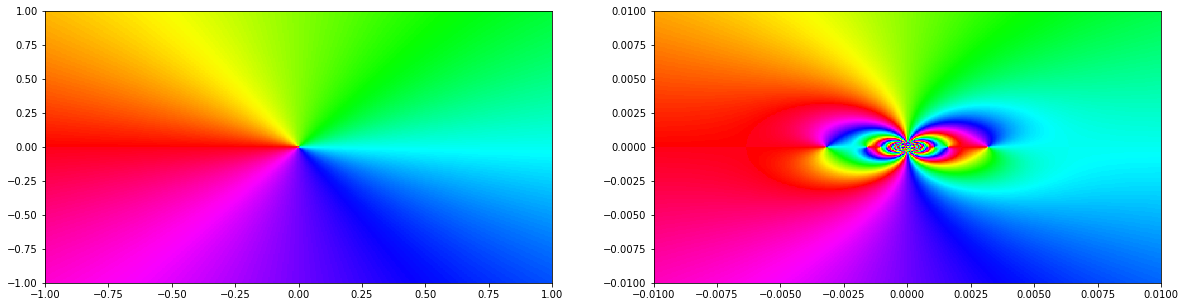

In [15]:
#1.)
plt.figure(figsize=(20,5))
plt.subplot(121)
f = lambda x,y: np.sin(1/(100*(x+1j*y)))
plot_complex(f, (-1,1), (-1,1), res=402)

plt.subplot(122)
plot_complex(f, (-0.01, 0.01),(-0.01, 0.01), res=402)

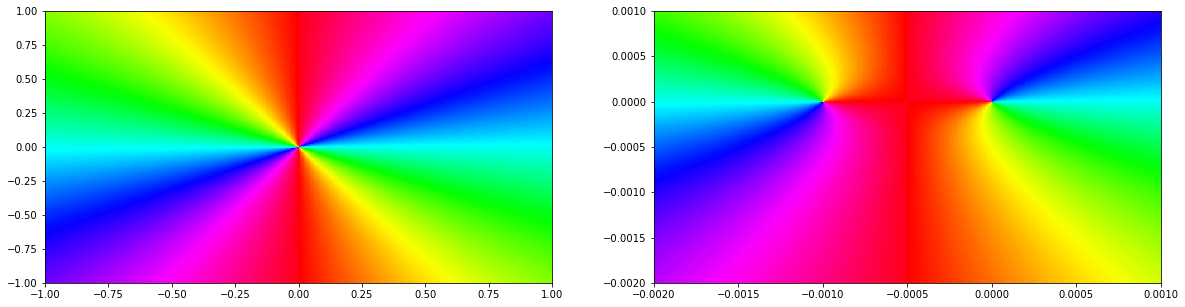

In [16]:
#2.)
plt.figure(figsize=(20,5))
plt.subplot(121)
f = lambda x,y: (x+1j*y) + 1000*(x+1j*y)**2
plot_complex(f, (-1,1), (-1,1), res=402)

plt.subplot(122)
plot_complex(f, (-0.002,0.001), (-0.001,0.001), res=402)

### Problem 8.
1. Use `plot_complex` to graph $f(z) = \sqrt{z}$. Use `np.sqrt()` to take the square root.
2. Now plot $f(z) = -\sqrt{z}$ to see the “other square root” of z. Describe why these two plots look the way they do.

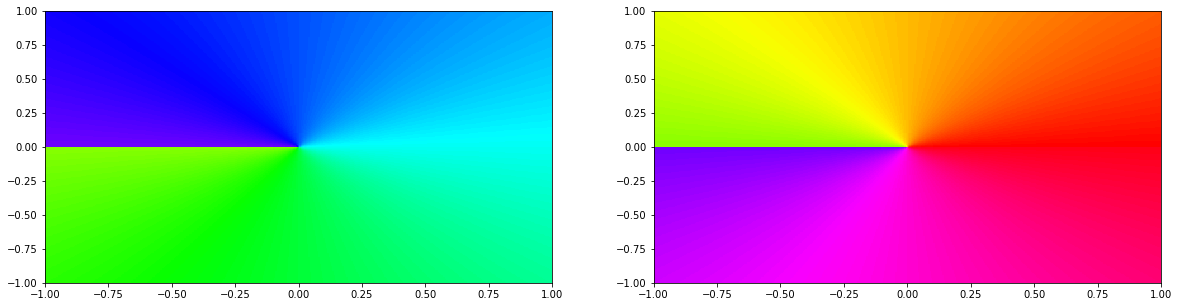

In [17]:
#1.)
plt.figure(figsize=(20,5))
plt.subplot(121)
f = lambda x,y: np.sqrt(x+1j*y)
plot_complex(f, (-1,1), (-1,1))

plt.subplot(122)
f = lambda x,y: -np.sqrt(x+1j*y)
plot_complex(f, (-1,1), (-1,1))